In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Linestring visualisation
import shapely.geometry
import shapely.wkt

# osmnx
import pandas as pd
import osmnx as ox

In [2]:
gdf = gpd.read_file("data/SanFranciscoSpeedLimitCompliance.csv")
gdf.crs = 'epsg:4326'

### Use wkt to load LineStrings from csv

In [3]:
gdf

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry
0,6709000,LINESTRING (-122.39031948388298 37.78813450234...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,None
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,None
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,None
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,None
4,194201,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,None
...,...,...,...,...,...,...,...,...,...,...
608,409000,LINESTRING (-122.41160611273487 37.77622135626...,30,8TH ST,16,1,26.2,32.31,37,None
609,410000,LINESTRING (-122.41106944267237 37.77579380416...,30,8TH ST,16,1,26.2,32.31,37,None
610,411000,LINESTRING (-122.41061072931767 37.77542835163...,30,8TH ST,16,1,26.2,32.31,37,None
611,415000,LINESTRING (-122.40851633075071 37.77375969975...,30,8TH ST,18,0,25.1,32,0,None


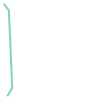

In [4]:
shapely.wkt.loads(gdf.the_geom[5])

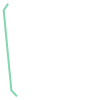

In [5]:
pol1 = shapely.wkt.loads(gdf.the_geom[4])
pol1

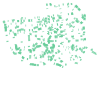

In [6]:
line = shapely.geometry.MultiLineString([shapely.wkt.loads(x) for x in gdf.the_geom])
line

### Add lines to the `geometry` column and print the result 

In [7]:
gdf['geometry'] = gdf.the_geom.apply(lambda x: shapely.wkt.loads(x) if x else GeometryCollection())
gdf.crs = {'init' : 'epsg:4326'}

E:\Anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

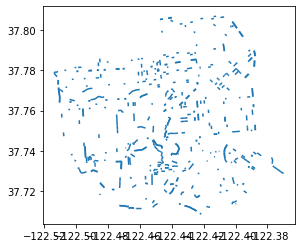

In [8]:
gdf.plot()

In [9]:
gdf.head()

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry
0,6709000,LINESTRING (-122.39031948388298 37.78813450234...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39032 37.78813, -122.39118 37..."
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39118 37.78746, -122.39205 37..."
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,"LINESTRING (-122.39962 37.78079, -122.40184 37..."
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38768 37..."
4,194201,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38782 37..."


### With use of osmnx create visualisation of San Francisco 

E:\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


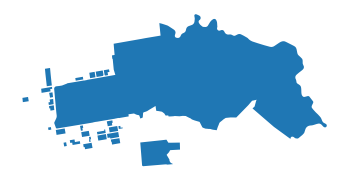

In [10]:
ox.config(log_console=True)
city = ox.geocode_to_gdf('Berkeley, California')
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

In [11]:
place_name = 'San Francisco, California'

E:\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


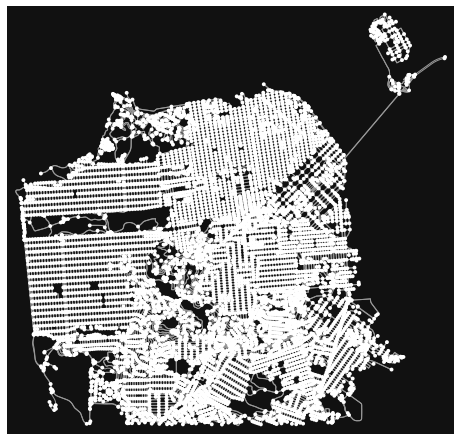

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [12]:
G = ox.graph_from_place(place_name, network_type='drive')
ox.plot_graph(G)

In [13]:
G

### San Francisco area

In [14]:
area = ox.geocode_to_gdf(place_name) # returns a GeoDataFrame based on the specified place name query
area

E:\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"MULTIPOLYGON (((-123.17382 37.77573, -123.1737...",37.929811,37.640314,-122.281479,-123.173825,337810601,relation,111968,37.779026,-122.419906,"San Francisco, California, United States",boundary,administrative,1.035131


<AxesSubplot:>

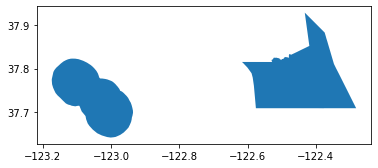

In [15]:
area.plot()
# check here: https://www.openstreetmap.org/search?query=San%20Francisco#map=11/37.7680/-122.7798

### San Francisco buildings

### San Francisco roads 

In [16]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(G)

In [17]:
nodes.head()

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
32927563,37.785921,-122.390945,3,NaN,NaN,POINT (-122.39094 37.78592)
32927591,37.731353,-122.424124,3,53,motorway_junction,POINT (-122.42412 37.73135)
32927645,37.732706,-122.413261,3,54B,motorway_junction,POINT (-122.41326 37.73271)
33241803,37.805042,-122.403450,5,NaN,traffic_signals,POINT (-122.40345 37.80504)
33242031,37.799054,-122.416484,1,NaN,NaN,POINT (-122.41648 37.79905)


In [18]:
nodes.crs = 'epsg:3395'

<AxesSubplot:>

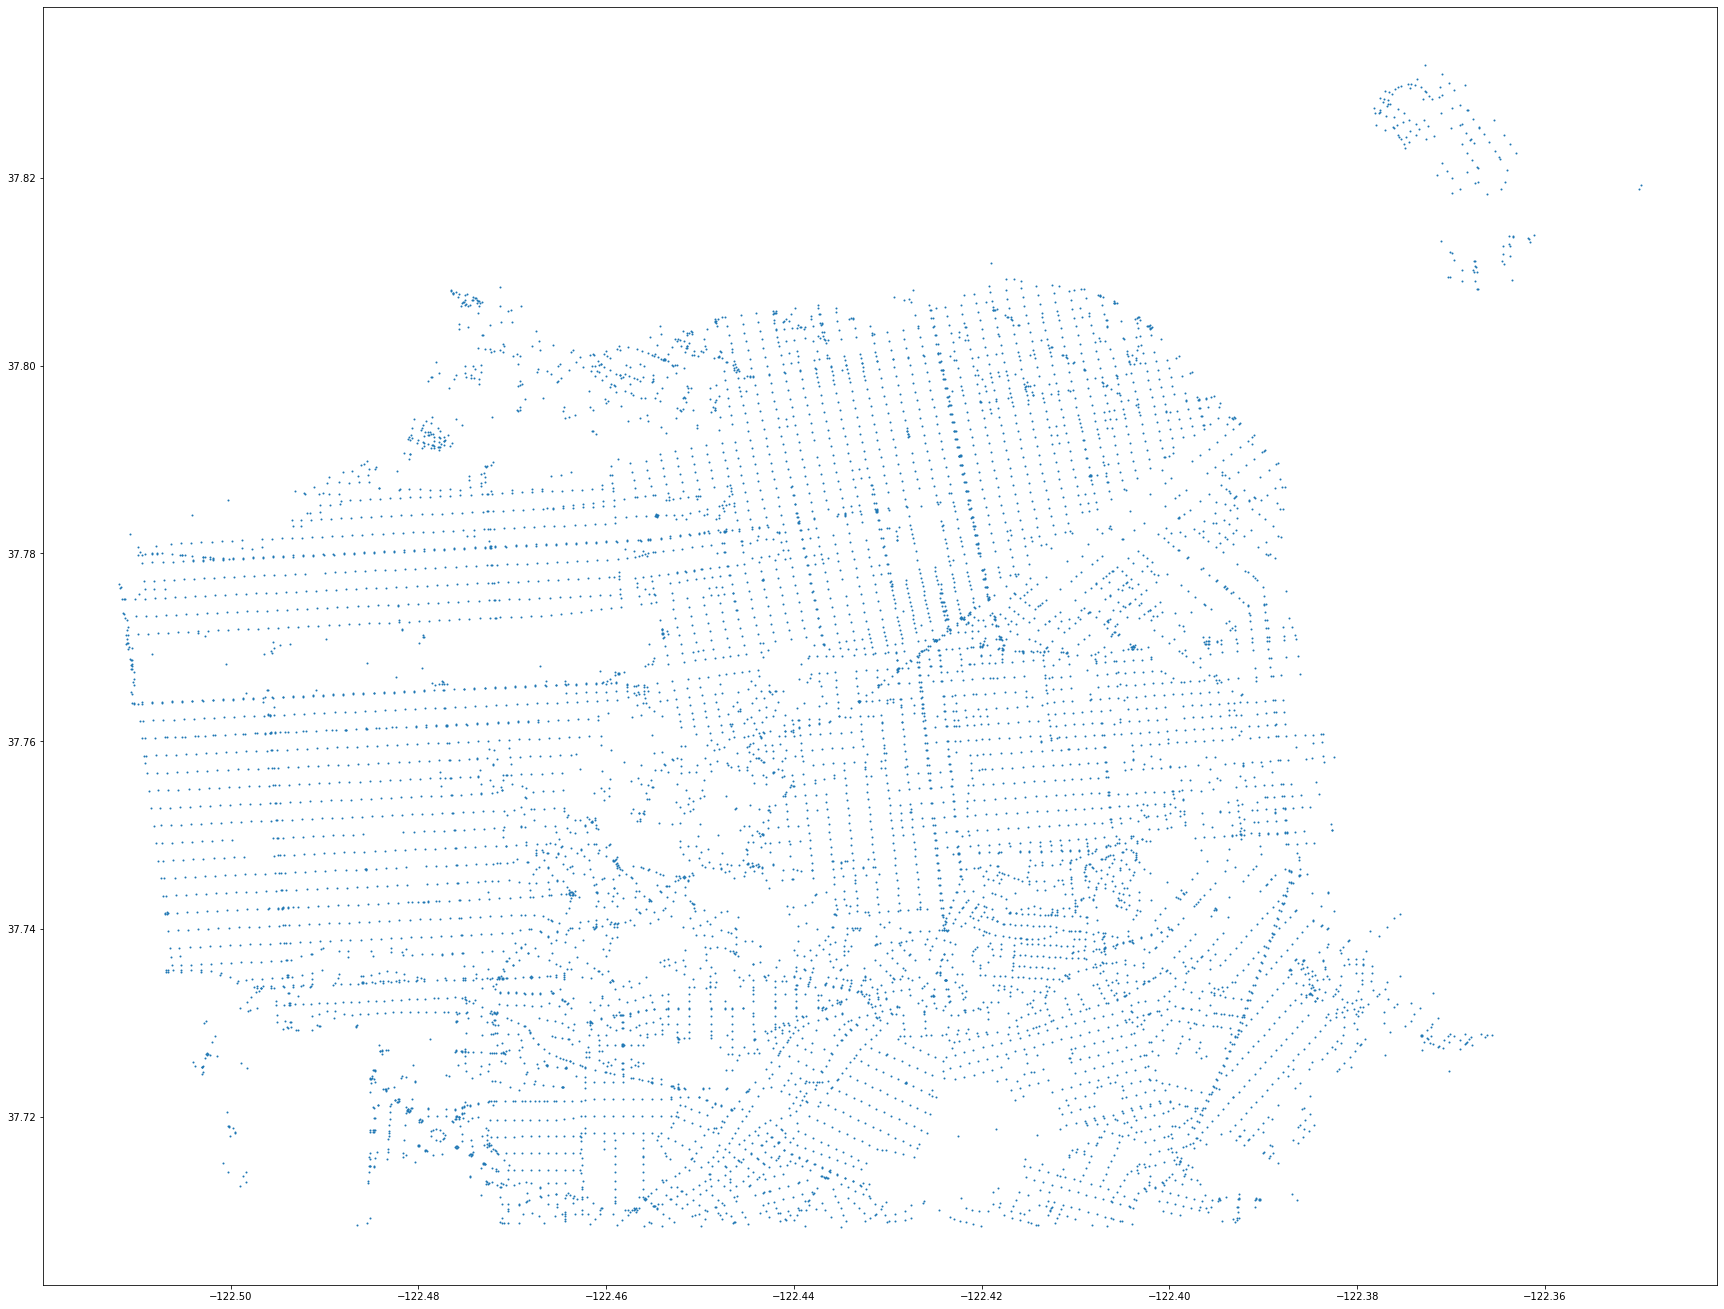

In [19]:
nodes.plot(markersize=1 ,figsize=(30, 30))

In [20]:
nodes.head()

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
32927563,37.785921,-122.390945,3,NaN,NaN,POINT (-122.391 37.786)
32927591,37.731353,-122.424124,3,53,motorway_junction,POINT (-122.424 37.731)
32927645,37.732706,-122.413261,3,54B,motorway_junction,POINT (-122.413 37.733)
33241803,37.805042,-122.403450,5,NaN,traffic_signals,POINT (-122.403 37.805)
33242031,37.799054,-122.416484,1,NaN,NaN,POINT (-122.416 37.799)


In [21]:
edges.head()

osmid  \
u        v          key                                                      
32927563 645559609  0                     [50690291, 179235221, 661905446]   
32927591 315706881  0                                             28715659   
         6469349533 0                                            689603997   
32927645 65331336   0                        [28846637, 8918870, 61424023]   
         766946830  0    [8915137, 33645923, 33645968, 28656664, 61424026]   

                         oneway lanes    ref  \
u        v          key                        
32927563 645559609  0      True     5   I 80   
32927591 315706881  0      True     1    NaN   
         6469349533 0      True     4  I 280   
32927645 65331336   0      True     2  I 280   
         766946830  0      True     2    NaN   

                                                       name        highway  \
u        v          key                                                      
32927563 645559609  0    San Francisco – Oakland Bay Bridge       motorway   
32927591 315706881  0                                   NaN  motorway_link   
         6469349533 0                  John F Foran Freeway       motorway   
32927645 65331336   0          Southern Embarcadero Freeway       motorway   
         766946830  0                                   NaN  motorway_link   

                        maxspeed    length bridge  \
u        v          key                             
32927563 645559609  0     50 mph  3232.712    yes   
32927591 315706881  0        NaN   333.165    NaN   
         6469349533 0     65 mph   794.493    NaN   
32927645 65331336   0     65 mph  1196.665    yes   
         766946830  0     50 mph  1174.585    yes   

                                                                  geometry  \
u        v          key                                                      
32927563 645559609  0    LINESTRING (-122.39094 37.78592, -122.39068 37...   
32927591 315706881  0    LINESTRING (-122.42412 37.73135, -122.42362 37...   
         6469349533 0    LINESTRING (-122.42412 37.73135, -122.42396 37...   
32927645 65331336   0    LINESTRING (-122.41326 37.73271, -122.41224 37...   
         766946830  0    LINESTRING (-122.41326 37.73271, -122.41217 37...   

                        access junction service width tunnel  
u        v          key                                       
32927563 645559609  0      NaN      NaN     NaN   NaN    NaN  
32927591 315706881  0      NaN      NaN     NaN   NaN    NaN  
         6469349533 0      NaN      NaN     NaN   NaN    NaN  
32927645 65331336   0      NaN      NaN     NaN   NaN    NaN  
         766946830  0      NaN      NaN     NaN   NaN    NaN

<AxesSubplot:>

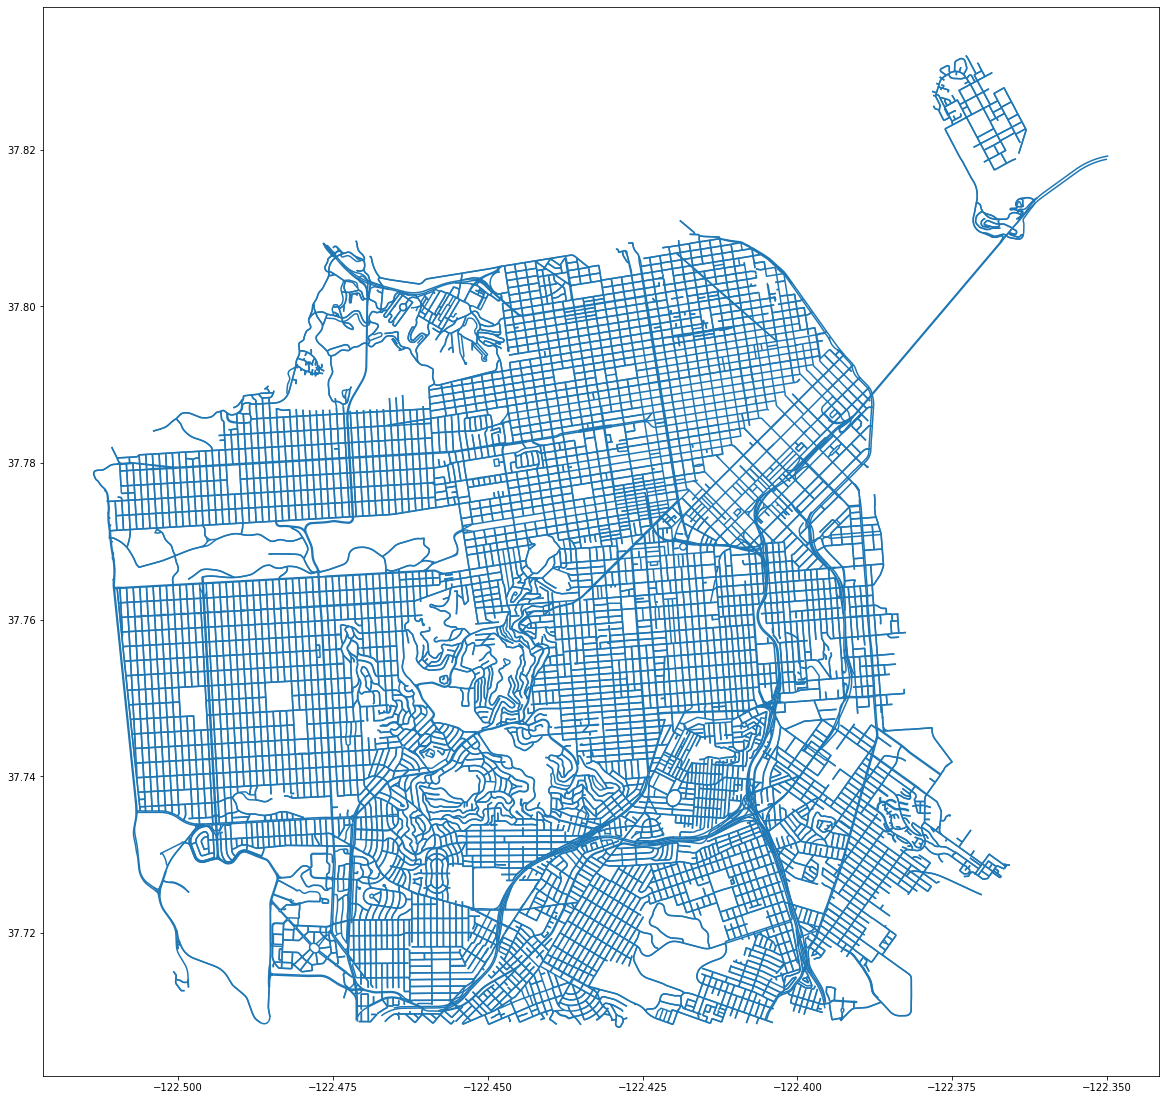

In [22]:
edges.plot(markersize=1 ,figsize=(20, 20))

In [23]:
edges.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 26881 entries, (32927563, 645559609, 0) to (9702068053, 9702068031, 0)
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osmid     26881 non-null  object  
 1   oneway    26881 non-null  bool    
 2   lanes     8869 non-null   object  
 3   ref       423 non-null    object  
 4   name      26189 non-null  object  
 5   highway   26881 non-null  object  
 6   maxspeed  5785 non-null   object  
 7   length    26881 non-null  float64 
 8   bridge    243 non-null    object  
 9   geometry  26881 non-null  geometry
 10  access    329 non-null    object  
 11  junction  161 non-null    object  
 12  service   5 non-null      object  
 13  width     72 non-null     object  
 14  tunnel    24 non-null     object  
dtypes: bool(1), float64(1), geometry(1), object(12)
memory usage: 3.7+ MB


In [24]:
edges['upper_name'] = edges['name'].str.upper()

In [25]:
edges['upper_name']

u           v           key
32927563    645559609   0      SAN FRANCISCO – OAKLAND BAY BRIDGE
32927591    315706881   0                                     NaN
            6469349533  0                    JOHN F FORAN FREEWAY
32927645    65331336    0            SOUTHERN EMBARCADERO FREEWAY
            766946830   0                                     NaN
                                              ...                
9702068036  9702068030  0                                     NaN
            9702068018  0                                     NaN
9702068053  65339934    0                            MACALLA ROAD
            65353407    0                            MACALLA ROAD
            9702068031  0                                     NaN
Name: upper_name, Length: 26881, dtype: object

In [26]:
edges.head()

osmid  \
u        v          key                                                      
32927563 645559609  0                     [50690291, 179235221, 661905446]   
32927591 315706881  0                                             28715659   
         6469349533 0                                            689603997   
32927645 65331336   0                        [28846637, 8918870, 61424023]   
         766946830  0    [8915137, 33645923, 33645968, 28656664, 61424026]   

                         oneway lanes    ref  \
u        v          key                        
32927563 645559609  0      True     5   I 80   
32927591 315706881  0      True     1    NaN   
         6469349533 0      True     4  I 280   
32927645 65331336   0      True     2  I 280   
         766946830  0      True     2    NaN   

                                                       name        highway  \
u        v          key                                                      
32927563 645559609  0    San Francisco – Oakland Bay Bridge       motorway   
32927591 315706881  0                                   NaN  motorway_link   
         6469349533 0                  John F Foran Freeway       motorway   
32927645 65331336   0          Southern Embarcadero Freeway       motorway   
         766946830  0                                   NaN  motorway_link   

                        maxspeed    length bridge  \
u        v          key                             
32927563 645559609  0     50 mph  3232.712    yes   
32927591 315706881  0        NaN   333.165    NaN   
         6469349533 0     65 mph   794.493    NaN   
32927645 65331336   0     65 mph  1196.665    yes   
         766946830  0     50 mph  1174.585    yes   

                                                                  geometry  \
u        v          key                                                      
32927563 645559609  0    LINESTRING (-122.39094 37.78592, -122.39068 37...   
32927591 315706881  0    LINESTRING (-122.42412 37.73135, -122.42362 37...   
         6469349533 0    LINESTRING (-122.42412 37.73135, -122.42396 37...   
32927645 65331336   0    LINESTRING (-122.41326 37.73271, -122.41224 37...   
         766946830  0    LINESTRING (-122.41326 37.73271, -122.41217 37...   

                        access junction service width tunnel  \
u        v          key                                        
32927563 645559609  0      NaN      NaN     NaN   NaN    NaN   
32927591 315706881  0      NaN      NaN     NaN   NaN    NaN   
         6469349533 0      NaN      NaN     NaN   NaN    NaN   
32927645 65331336   0      NaN      NaN     NaN   NaN    NaN   
         766946830  0      NaN      NaN     NaN   NaN    NaN   

                                                 upper_name  
u        v          key                                      
32927563 645559609  0    SAN FRANCISCO – OAKLAND BAY BRIDGE  
32927591 315706881  0                                   NaN  
         6469349533 0                  JOHN F FORAN FREEWAY  
32927645 65331336   0          SOUTHERN EMBARCADERO FREEWAY  
         766946830  0                                   NaN

In [27]:
gdf.head()

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry
0,6709000,LINESTRING (-122.39031948388298 37.78813450234...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39032 37.78813, -122.39118 37..."
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39118 37.78746, -122.39205 37..."
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,"LINESTRING (-122.39962 37.78079, -122.40184 37..."
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38768 37..."
4,194201,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38782 37..."


### Plot `Speed limit compliance in San Francisco` data on San Francisco map

E:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
E:\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
E:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
E:\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
E:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are depreca

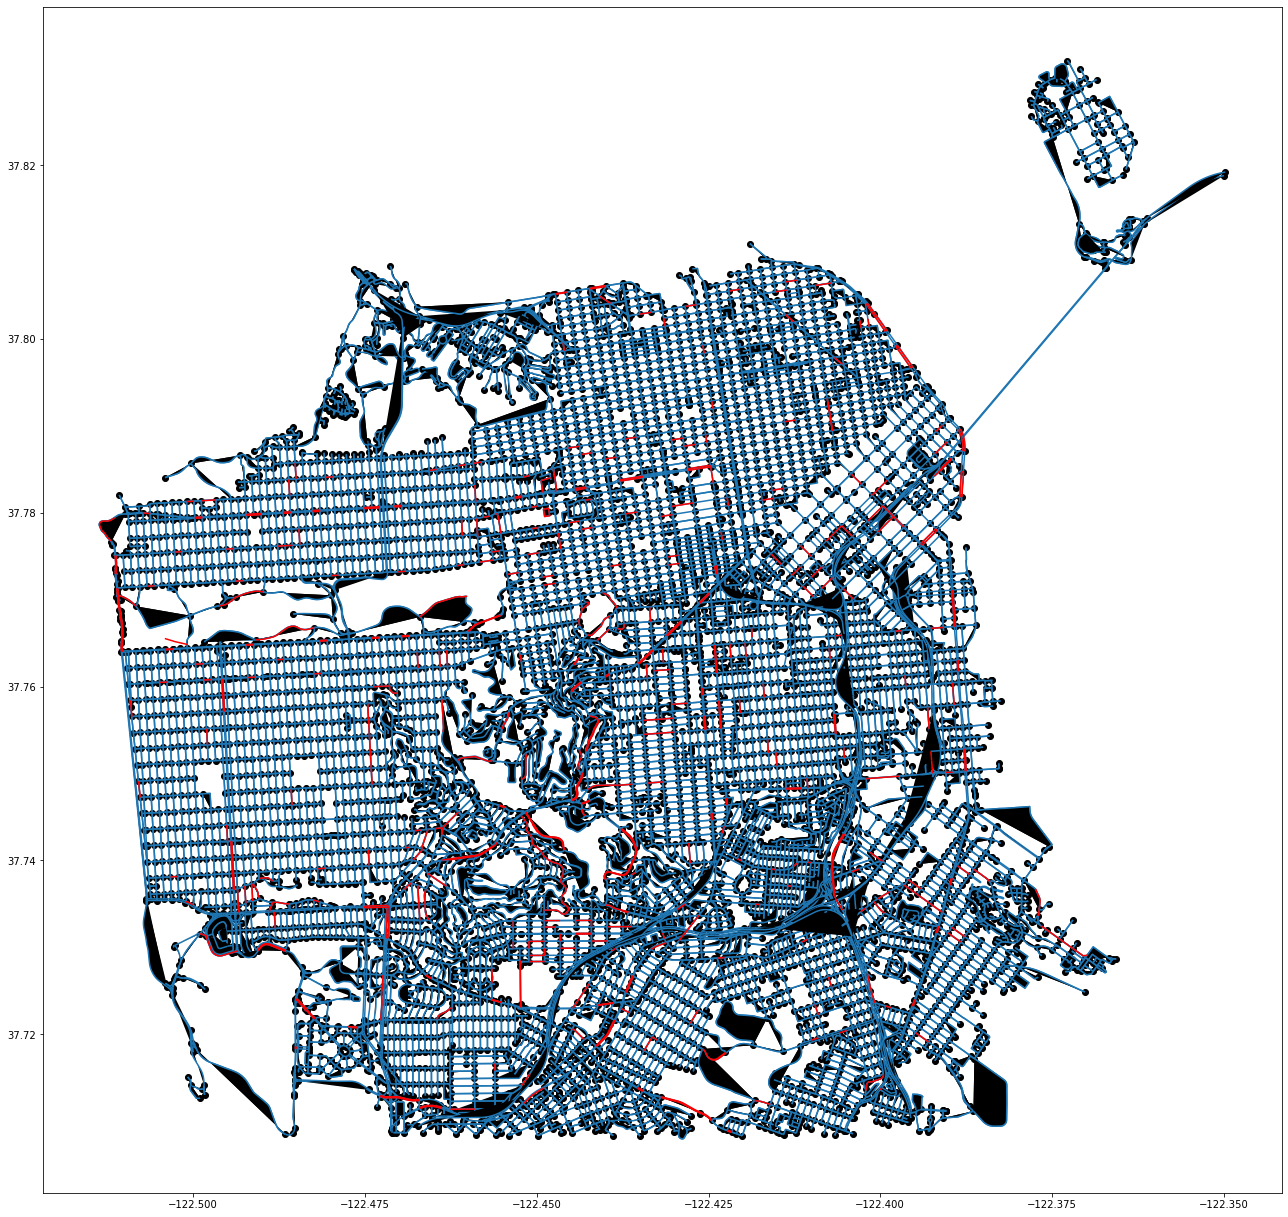

In [108]:
fig, ax = plt.subplots(figsize=(18,20))

# Plot the footprint
edges.plot(ax=ax, facecolor='black')
nodes.plot(ax=ax, facecolor='black')
gdf.plot(ax=ax, color='red')
plt.tight_layout()

In [30]:
gdf.geometry

0      LINESTRING (-122.39032 37.78813, -122.39118 37...
1      LINESTRING (-122.39118 37.78746, -122.39205 37...
2      LINESTRING (-122.39962 37.78079, -122.40184 37...
3      LINESTRING (-122.38776 37.75284, -122.38768 37...
4      LINESTRING (-122.38776 37.75284, -122.38782 37...
                             ...                        
608    LINESTRING (-122.41161 37.77622, -122.41107 37...
609    LINESTRING (-122.41107 37.77579, -122.41061 37...
610    LINESTRING (-122.41061 37.77543, -122.41006 37...
611    LINESTRING (-122.40852 37.77376, -122.40843 37...
612    LINESTRING (-122.40542 37.77130, -122.40388 37...
Name: geometry, Length: 613, dtype: geometry

In [31]:
edges.geometry

u           v           key
32927563    645559609   0      LINESTRING (-122.39094 37.78592, -122.39068 37...
32927591    315706881   0      LINESTRING (-122.42412 37.73135, -122.42362 37...
            6469349533  0      LINESTRING (-122.42412 37.73135, -122.42396 37...
32927645    65331336    0      LINESTRING (-122.41326 37.73271, -122.41224 37...
            766946830   0      LINESTRING (-122.41326 37.73271, -122.41217 37...
                                                     ...                        
9702068036  9702068030  0      LINESTRING (-122.36740 37.81046, -122.36736 37...
            9702068018  0      LINESTRING (-122.36740 37.81046, -122.36744 37...
9702068053  65339934    0      LINESTRING (-122.37011 37.81214, -122.37018 37...
            65353407    0      LINESTRING (-122.37011 37.81214, -122.37001 37...
            9702068031  0      LINESTRING (-122.37011 37.81214, -122.37048 37...
Name: geometry, Length: 26881, dtype: geometry

In [32]:
join_result = gdf.sjoin(edges, how="inner", predicate='intersects')

E:\Anaconda3\envs\ox\lib\site-packages\geopandas\geodataframe.py:1938: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


In [33]:
join_result

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry,...,highway,maxspeed,length,bridge,access,junction,service,width,tunnel,upper_name
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39118 37.78746, -122.39205 37...",...,residential,NaN,385.207,NaN,NaN,NaN,NaN,NaN,NaN,BEALE STREET
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39118 37.78746, -122.39205 37...",...,residential,NaN,385.207,NaN,NaN,NaN,NaN,NaN,NaN,BEALE STREET
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,"LINESTRING (-122.39962 37.78079, -122.40184 37...",...,motorway_link,50 mph,371.837,yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,"LINESTRING (-122.39962 37.78079, -122.40184 37...",...,secondary,NaN,65.148,NaN,NaN,NaN,NaN,NaN,NaN,4TH STREET
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,"LINESTRING (-122.39962 37.78079, -122.40184 37...",...,secondary,NaN,69.368,NaN,NaN,NaN,NaN,NaN,NaN,4TH STREET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,409000,LINESTRING (-122.41160611273487 37.77622135626...,30,8TH ST,16,1,26.2,32.31,37,"LINESTRING (-122.41161 37.77622, -122.41107 37...",...,secondary,25 mph,138.067,NaN,NaN,NaN,NaN,NaN,NaN,HOWARD STREET
610,411000,LINESTRING (-122.41061072931767 37.77542835163...,30,8TH ST,16,1,26.2,32.31,37,"LINESTRING (-122.41061 37.77543, -122.41006 37...",...,secondary,25 mph,138.856,NaN,NaN,NaN,NaN,NaN,NaN,FOLSOM STREET
611,415000,LINESTRING (-122.40851633075071 37.77375969975...,30,8TH ST,18,0,25.1,32,0,"LINESTRING (-122.40852 37.77376, -122.40843 37...",...,motorway_link,50 mph,87.614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,417000,LINESTRING (-122.40542473456291 37.77129635368...,30,8TH ST,9.95,0,24.16,32,0,"LINESTRING (-122.40542 37.77130, -122.40388 37...",...,tertiary,NaN,9.442,NaN,NaN,roundabout,NaN,NaN,NaN,NaN


In [34]:
gdf['STREETNAME'].unique()

array(['HARRISON ST', '3RD ST', '3RD AVE', '6TH ST', '4TH ST',
       'INNES AVE', 'PORTOLA DR', 'YERBA BUENA AVE', 'WOOD ST',
       'WOODSIDE AVE', 'WHITNEY ST', 'WAWONA ST', 'VICENTE ST',
       'VALENCIA ST', 'UTAH ST', 'JUNIPERO SERRA BLVD', 'ULLOA ST',
       'TURK ST', 'TURK BLVD', 'TOMPKINS AVE', 'TOPEKA AVE',
       'THE EMBARCADERO', 'TERRA VISTA AVE', 'TENNESSEE ST',
       'TERESITA BLVD', 'TARAVAL ST', 'SUNSET BLVD', 'SUNNYDALE AVE',
       'STOCKTON ST', 'STOCKTON TUNL', 'STAPLES AVE', 'STARVIEW WAY',
       'STANYAN BLVD', 'STANYAN ST', 'SOUTH VAN NESS AVE',
       'SPRINGFIELD DR', 'MARTIN LUTHER KING JR DR', 'SLOAT BLVD',
       'SOMERSET ST', 'SILVER AVE', 'SHOTWELL ST', 'SANSOME ST',
       'SANTA CLARA AVE', 'SANCHEZ ST', 'SAN JOSE AVE', 'SAN BRUNO AVE',
       'SAN BENITO WAY', 'SAGAMORE ST', 'RUSSIA AVE', 'ROOSEVELT WAY',
       'RIDGEWOOD AVE', 'REVERE AVE', 'QUESADA AVE', 'PROSPER ST',
       'POTRERO AVE', 'POINT LOBOS AVE', 'PINE ST', 'PLYMOUTH AVE',
       'P

In [35]:
join_result['upper_name']

1         BEALE STREET
1         BEALE STREET
2                  NaN
2           4TH STREET
2           4TH STREET
            ...       
608      HOWARD STREET
610      FOLSOM STREET
611                NaN
612                NaN
612    TOWNSEND STREET
Name: upper_name, Length: 1422, dtype: object

In [45]:
names = [x.split(' ')[0] for x in join_result['STREETNAME']]
check_if_contains = lambda x: any(map(x.__contains__, names))
without_nan = join_result.dropna(subset=['upper_name'])

result = without_nan[without_nan['upper_name'].apply(check_if_contains)]
result.drop_duplicates('CNN')

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry,...,highway,maxspeed,length,bridge,access,junction,service,width,tunnel,upper_name
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,"LINESTRING (-122.39962 37.78079, -122.40184 37...",...,secondary,NaN,65.148,NaN,NaN,NaN,NaN,NaN,NaN,4TH STREET
28,259000,LINESTRING (-122.39961623244395 37.78079148306...,0,4TH ST,69,32,27.35,30.12,33.72,"LINESTRING (-122.39962 37.78079, -122.39908 37...",...,secondary,NaN,69.368,NaN,NaN,NaN,NaN,NaN,NaN,4TH STREET
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38768 37...",...,unclassified,NaN,13.634,NaN,NaN,NaN,NaN,NaN,NaN,26TH STREET
4,194201,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38782 37...",...,unclassified,NaN,13.634,NaN,NaN,NaN,NaN,NaN,NaN,26TH STREET
5,195101,LINESTRING (-122.38763397457048 37.75155960356...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38763 37.75156, -122.38756 37...",...,primary,NaN,20.449,NaN,NaN,NaN,NaN,NaN,NaN,CESAR CHAVEZ STREET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,702000,LINESTRING (-122.39689710424506 37.76642996856...,0,16TH ST,94,60.5,30.75,31.39,33.82,"LINESTRING (-122.39690 37.76643, -122.39786 37...",...,residential,NaN,146.152,NaN,NaN,NaN,NaN,NaN,NaN,MISSOURI STREET
601,713000,LINESTRING (-122.40558529539535 37.76590040105...,0,16TH ST,72,21,26.82,28.77,33.07,"LINESTRING (-122.40559 37.76590, -122.40655 37...",...,residential,NaN,145.247,NaN,NaN,NaN,NaN,NaN,NaN,SAN BRUNO AVENUE
603,471000,LINESTRING (-122.4673832314509 37.763989888299...,0,10TH AVE,34.36,7.71,22.12,28.44,33.39,"LINESTRING (-122.46738 37.76399, -122.46725 37...",...,tertiary,NaN,96.854,NaN,NaN,NaN,NaN,NaN,NaN,JUDAH STREET
607,490000,LINESTRING (-122.41127793723784 37.77157867720...,30,10TH ST,24,4,26.35,32.83,37,"LINESTRING (-122.41128 37.77158, -122.40974 37...",...,secondary,25 mph,74.531,NaN,NaN,NaN,NaN,NaN,NaN,BRYANT STREET


<AxesSubplot:>

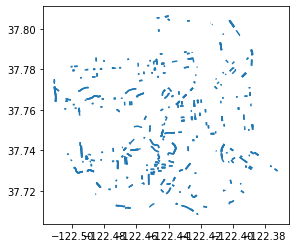

In [37]:
result.plot()

In [47]:
# where upper_name and STREETNAME columns corresponds to each other
is_streetname_equal_upper_name = []

for idx, row in without_nan.iterrows():
    print(idx, row['STREETNAME'])
    is_streetname_equal_upper_name.append(row['STREETNAME'].split(' ')[0] in row['upper_name'])

same_street_name = without_nan[is_streetname_equal_upper_name]
same_street_name

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry,...,highway,maxspeed,length,bridge,access,junction,service,width,tunnel,upper_name
28,259000,LINESTRING (-122.39961623244395 37.78079148306...,0,4TH ST,69,32,27.35,30.12,33.72,"LINESTRING (-122.39962 37.78079, -122.39908 37...",...,secondary,NaN,69.368,NaN,NaN,NaN,NaN,NaN,NaN,4TH STREET
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38768 37...",...,primary,30 mph,137.642,NaN,NaN,NaN,NaN,NaN,NaN,3RD STREET
5,195101,LINESTRING (-122.38763397457048 37.75155960356...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38763 37.75156, -122.38756 37...",...,primary,30 mph,137.102,NaN,NaN,NaN,NaN,NaN,NaN,3RD STREET
15,188101,LINESTRING (-122.38873799832506 37.76304827898...,30,3RD ST,50.5,13.5,30.04,33.91,39.15,"LINESTRING (-122.38874 37.76305, -122.38866 37...",...,primary,30 mph,142.265,NaN,NaN,NaN,NaN,NaN,NaN,3RD STREET
17,208101,LINESTRING (-122.38958738016719 37.73795539583...,30,3RD ST,15.08,4.52,25.34,33.5,37,"LINESTRING (-122.38959 37.73796, -122.38956 37...",...,primary,30 mph,91.955,NaN,NaN,NaN,NaN,NaN,NaN,3RD STREET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,2175101,LINESTRING (-122.44895044319458 37.71388616824...,35,ALEMANY BLVD,69,25,36.9,39.36,43.52,"LINESTRING (-122.44895 37.71389, -122.44899 37...",...,primary,35 mph,334.561,NaN,NaN,NaN,NaN,NaN,NaN,ALEMANY BOULEVARD
575,2160101,LINESTRING (-122.43119165775887 37.73056751319...,35,ALEMANY BLVD,25,3.5,31.52,37.8,42.71,"LINESTRING (-122.43119 37.73057, -122.43128 37...",...,primary,35 mph,209.637,NaN,NaN,NaN,NaN,NaN,NaN,ALEMANY BOULEVARD
587,1203000,LINESTRING (-122.42996167469457 37.75476123055...,0,22ND ST,42.79,11.24,22.46,28.57,32.99,"LINESTRING (-122.42996 37.75476, -122.43218 37...",...,residential,NaN,194.291,NaN,NaN,NaN,NaN,NaN,NaN,22ND STREET
587,1203000,LINESTRING (-122.42996167469457 37.75476123055...,0,22ND ST,42.79,11.24,22.46,28.57,32.99,"LINESTRING (-122.42996 37.75476, -122.43218 37...",...,residential,NaN,194.291,NaN,NaN,NaN,NaN,NaN,NaN,22ND STREET


<AxesSubplot:>

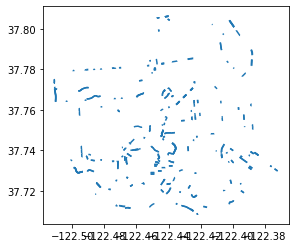

In [39]:
same_street_name.plot()

In [ ]:
names = list(np.unique([x.split(' ')[0].upper().strip() for x in join_result['STREETNAME']]))
names

In [41]:
check_if_contains = lambda x: any(map(x.__contains__, names))
check_if_contains('WOOD')

True

In [ ]:
for x in join_result['upper_name']:
    print(x)

In [88]:
gdf

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry
0,6709000,LINESTRING (-122.39031948388298 37.78813450234...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39032 37.78813, -122.39118 37..."
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39118 37.78746, -122.39205 37..."
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,"LINESTRING (-122.39962 37.78079, -122.40184 37..."
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38768 37..."
4,194201,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38782 37..."
...,...,...,...,...,...,...,...,...,...,...
608,409000,LINESTRING (-122.41160611273487 37.77622135626...,30,8TH ST,16,1,26.2,32.31,37,"LINESTRING (-122.41161 37.77622, -122.41107 37..."
609,410000,LINESTRING (-122.41106944267237 37.77579380416...,30,8TH ST,16,1,26.2,32.31,37,"LINESTRING (-122.41107 37.77579, -122.41061 37..."
610,411000,LINESTRING (-122.41061072931767 37.77542835163...,30,8TH ST,16,1,26.2,32.31,37,"LINESTRING (-122.41061 37.77543, -122.41006 37..."
611,415000,LINESTRING (-122.40851633075071 37.77375969975...,30,8TH ST,18,0,25.1,32,0,"LINESTRING (-122.40852 37.77376, -122.40843 37..."


In [94]:
edges.head()

osmid  \
u        v          key                                                      
32927563 645559609  0                     [50690291, 179235221, 661905446]   
32927591 315706881  0                                             28715659   
         6469349533 0                                            689603997   
32927645 65331336   0                        [28846637, 8918870, 61424023]   
         766946830  0    [8915137, 33645923, 33645968, 28656664, 61424026]   

                         oneway lanes    ref  \
u        v          key                        
32927563 645559609  0      True     5   I 80   
32927591 315706881  0      True     1    NaN   
         6469349533 0      True     4  I 280   
32927645 65331336   0      True     2  I 280   
         766946830  0      True     2    NaN   

                                                       name        highway  \
u        v          key                                                      
32927563 645559609  0    San Francisco – Oakland Bay Bridge       motorway   
32927591 315706881  0                                   NaN  motorway_link   
         6469349533 0                  John F Foran Freeway       motorway   
32927645 65331336   0          Southern Embarcadero Freeway       motorway   
         766946830  0                                   NaN  motorway_link   

                        maxspeed    length bridge  \
u        v          key                             
32927563 645559609  0     50 mph  3232.712    yes   
32927591 315706881  0        NaN   333.165    NaN   
         6469349533 0     65 mph   794.493    NaN   
32927645 65331336   0     65 mph  1196.665    yes   
         766946830  0     50 mph  1174.585    yes   

                                                                  geometry  \
u        v          key                                                      
32927563 645559609  0    LINESTRING (-122.39094 37.78592, -122.39068 37...   
32927591 315706881  0    LINESTRING (-122.42412 37.73135, -122.42362 37...   
         6469349533 0    LINESTRING (-122.42412 37.73135, -122.42396 37...   
32927645 65331336   0    LINESTRING (-122.41326 37.73271, -122.41224 37...   
         766946830  0    LINESTRING (-122.41326 37.73271, -122.41217 37...   

                        access junction service width tunnel  \
u        v          key                                        
32927563 645559609  0      NaN      NaN     NaN   NaN    NaN   
32927591 315706881  0      NaN      NaN     NaN   NaN    NaN   
         6469349533 0      NaN      NaN     NaN   NaN    NaN   
32927645 65331336   0      NaN      NaN     NaN   NaN    NaN   
         766946830  0      NaN      NaN     NaN   NaN    NaN   

                                                 upper_name  
u        v          key                                      
32927563 645559609  0    SAN FRANCISCO – OAKLAND BAY BRIDGE  
32927591 315706881  0                                   NaN  
         6469349533 0                  JOHN F FORAN FREEWAY  
32927645 65331336   0          SOUTHERN EMBARCADERO FREEWAY  
         766946830  0                                   NaN

In [101]:
gdf_edges = edges[edges['name'].notna()]
gdf_edges 

osmid  oneway lanes  \
u          v          key                                                   
32927563   645559609  0    [50690291, 179235221, 661905446]    True     5   
32927591   6469349533 0                           689603997    True     4   
32927645   65331336   0       [28846637, 8918870, 61424023]    True     2   
33241803   2071244784 0                           196831109    True   NaN   
           8865870141 0                           992135723    True     3   
...                                                     ...     ...   ...   
9691602789 9691587709 0                          1054650004   False     2   
           65315830   0                          1054650007    True     2   
9702068036 667475248  0                [456140682, 8916443]   False   NaN   
9702068053 65339934   0                           801455567   False   NaN   
           65353407   0                           801455567   False   NaN   

                             ref                                name  \
u          v          key                                              
32927563   645559609  0     I 80  San Francisco – Oakland Bay Bridge   
32927591   6469349533 0    I 280                John F Foran Freeway   
32927645   65331336   0    I 280        Southern Embarcadero Freeway   
33241803   2071244784 0      NaN                     Chestnut Street   
           8865870141 0      NaN                     The Embarcadero   
...                          ...                                 ...   
9691602789 9691587709 0      NaN          Van Ness Bus Rapid Transit   
           65315830   0      NaN          Van Ness Bus Rapid Transit   
9702068036 667475248  0      NaN            [Sims Road, Forest Road]   
9702068053 65339934   0      NaN                        Macalla Road   
           65353407   0      NaN                        Macalla Road   

                                highway maxspeed    length bridge  \
u          v          key                                           
32927563   645559609  0        motorway   50 mph  3232.712    yes   
32927591   6469349533 0        motorway   65 mph   794.493    NaN   
32927645   65331336   0        motorway   65 mph  1196.665    yes   
33241803   2071244784 0     residential      NaN    20.325    NaN   
           8865870141 0         primary   30 mph    30.791    NaN   
...                                 ...      ...       ...    ...   
9691602789 9691587709 0          busway      NaN   198.122    NaN   
           65315830   0          busway      NaN    36.916    NaN   
9702068036 667475248  0    unclassified      NaN   645.630    NaN   
9702068053 65339934   0        tertiary      NaN   161.358    NaN   
           65353407   0        tertiary      NaN    30.991    NaN   

                                                                    geometry  \
u          v          key                                                      
32927563   645559609  0    LINESTRING (-122.39094 37.78592, -122.39068 37...   
32927591   6469349533 0    LINESTRING (-122.42412 37.73135, -122.42396 37...   
32927645   65331336   0    LINESTRING (-122.41326 37.73271, -122.41224 37...   
33241803   2071244784 0    LINESTRING (-122.40345 37.80504, -122.40355 37...   
           8865870141 0    LINESTRING (-122.40345 37.80504, -122.40333 37...   
...                                                                      ...   
9691602789 9691587709 0    LINESTRING (-122.41872 37.77337, -122.41892 37...   
           65315830   0    LINESTRING (-122.41872 37.77337, -122.41871 37...   
9702068036 667475248  0    LINESTRING (-122.36740 37.81046, -122.36721 37...   
9702068053 65339934   0    LINESTRING (-122.37011 37.81214, -122.37018 37...   
           65353407   0    LINESTRING (-122.37011 37.81214, -122.37001 37...   

                          access junction service width tunnel  \
u          v          key                                        
32927563   645559609  0      NaN      NaN   

In [ ]:
roads = gdf_edges[['name', 'geometry']]
sum_roads = roads.dissolve(by='name', aggfunc='sum')
roads

In [110]:
gdf_edges['bridge'].fillna('25 mph', inplace=True)

C:\Users\kuba2\AppData\Local\Temp\ipykernel_18992\469286810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_edges['bridge'].fillna('25 mph', inplace=True)


In [111]:
gdf_edges

osmid  oneway lanes  \
u          v          key                                                   
32927563   645559609  0    [50690291, 179235221, 661905446]    True     5   
32927591   6469349533 0                           689603997    True     4   
32927645   65331336   0       [28846637, 8918870, 61424023]    True     2   
33241803   2071244784 0                           196831109    True   NaN   
           8865870141 0                           992135723    True     3   
...                                                     ...     ...   ...   
9691602789 9691587709 0                          1054650004   False     2   
           65315830   0                          1054650007    True     2   
9702068036 667475248  0                [456140682, 8916443]   False   NaN   
9702068053 65339934   0                           801455567   False   NaN   
           65353407   0                           801455567   False   NaN   

                             ref                                name  \
u          v          key                                              
32927563   645559609  0     I 80  San Francisco – Oakland Bay Bridge   
32927591   6469349533 0    I 280                John F Foran Freeway   
32927645   65331336   0    I 280        Southern Embarcadero Freeway   
33241803   2071244784 0      NaN                     Chestnut Street   
           8865870141 0      NaN                     The Embarcadero   
...                          ...                                 ...   
9691602789 9691587709 0      NaN          Van Ness Bus Rapid Transit   
           65315830   0      NaN          Van Ness Bus Rapid Transit   
9702068036 667475248  0      NaN            [Sims Road, Forest Road]   
9702068053 65339934   0      NaN                        Macalla Road   
           65353407   0      NaN                        Macalla Road   

                                highway maxspeed    length  bridge  \
u          v          key                                            
32927563   645559609  0        motorway   50 mph  3232.712     yes   
32927591   6469349533 0        motorway   65 mph   794.493  25 mph   
32927645   65331336   0        motorway   65 mph  1196.665     yes   
33241803   2071244784 0     residential      NaN    20.325  25 mph   
           8865870141 0         primary   30 mph    30.791  25 mph   
...                                 ...      ...       ...     ...   
9691602789 9691587709 0          busway      NaN   198.122  25 mph   
           65315830   0          busway      NaN    36.916  25 mph   
9702068036 667475248  0    unclassified      NaN   645.630  25 mph   
9702068053 65339934   0        tertiary      NaN   161.358  25 mph   
           65353407   0        tertiary      NaN    30.991  25 mph   

                                                                    geometry  \
u          v          key                                                      
32927563   645559609  0    LINESTRING (-122.39094 37.78592, -122.39068 37...   
32927591   6469349533 0    LINESTRING (-122.42412 37.73135, -122.42396 37...   
32927645   65331336   0    LINESTRING (-122.41326 37.73271, -122.41224 37...   
33241803   2071244784 0    LINESTRING (-122.40345 37.80504, -122.40355 37...   
           8865870141 0    LINESTRING (-122.40345 37.80504, -122.40333 37...   
...                                                                      ...   
9691602789 9691587709 0    LINESTRING (-122.41872 37.77337, -122.41892 37...   
           65315830   0    LINESTRING (-122.41872 37.77337, -122.41871 37...   
9702068036 667475248  0    LINESTRING (-122.36740 37.81046, -122.36721 37...   
9702068053 65339934   0    LINESTRING (-122.37011 37.81214, -122.37018 37...   
           65353407   0    LINESTRING (-122.37011 37.81214, -122.37001 37...   

                          access junction service width tunnel  \
u          v          key                                        
32927563   645559609  0      Na